In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X =  pd.read_csv('Training Data/Linear_X_Train.csv')

In [3]:
y =  pd.read_csv('Training Data/Linear_Y_Train.csv')

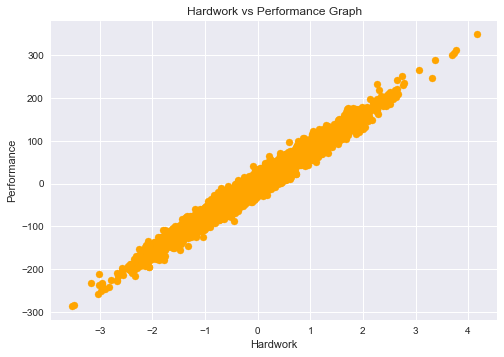

In [4]:
# Convert X,Y to Numpy arrays
X = X.values
y = y.values

# Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std


# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [5]:
def hypothesis(x,theta):
    # theta = [theta0,theta1]
    y_ = theta[0] + theta[1]*x
    return y_

In [6]:
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y  = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m
    

In [7]:
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return total_error/m

In [8]:
def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        # Compute grad
        grad = gradient(X,Y,theta)
        # Compute error
        e = error(X,Y,theta)
        error_list.append(e)
        # Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        
    return theta,error_list,theta_list
        

In [9]:
theta,error_list,theta_list = gradientDescent(X,y)

In [10]:
theta

array([ 0.6838508 , 79.90361453])

In [11]:
# error_list

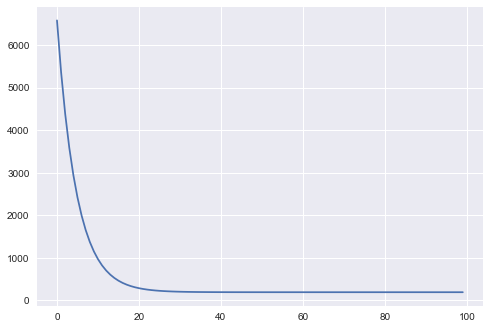

In [12]:
plt.plot(error_list)

In [13]:
y_ = hypothesis(X,theta)

In [14]:
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


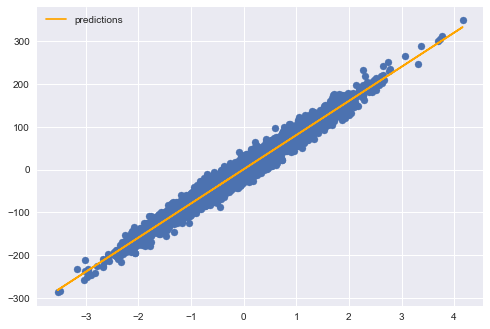

In [15]:
# Training Data + Predictions
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label='predictions')
plt.legend()
plt.show()

In [16]:
X_test = pd.read_csv('Test Cases/Linear_X_Test.csv').values

In [17]:
y_test = hypothesis(X_test,theta)
y_test.shape

(1250, 1)

In [18]:
df = pd.DataFrame(data=y_test,columns=["y"])

In [19]:
df.to_csv('answer.csv',index=False)

In [20]:
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [21]:
r2_score(y,y_)

97.09612226971643

In [22]:
from mpl_toolkits.mplot3d import Axes3D

In [24]:
theta

array([ 0.6838508 , 79.90361453])

In [37]:
# Loss Actually
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]
        
# print(J.shape) 


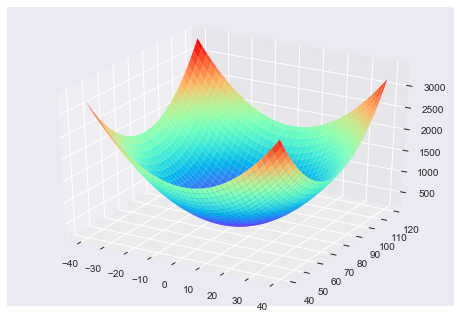

In [38]:
# Visualise the J (loss)

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

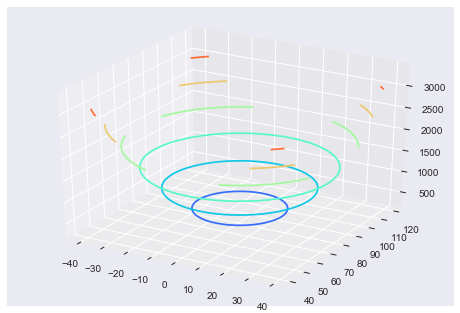

In [39]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

In [40]:
theta_list = np.array(theta_list)

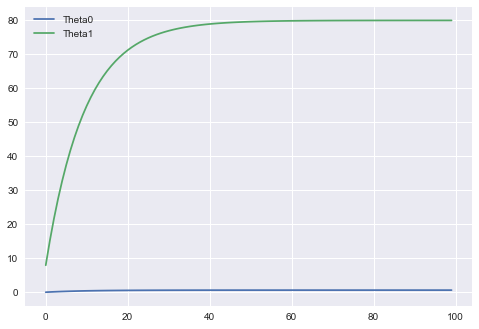

In [41]:
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

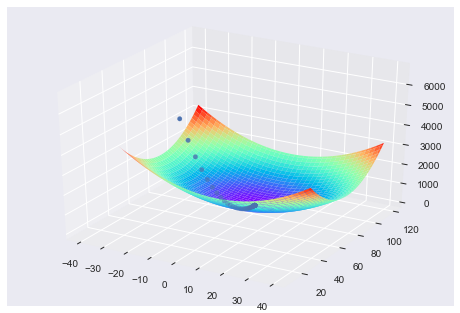

In [42]:
# Trajectory traced by theta updates in loss function
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

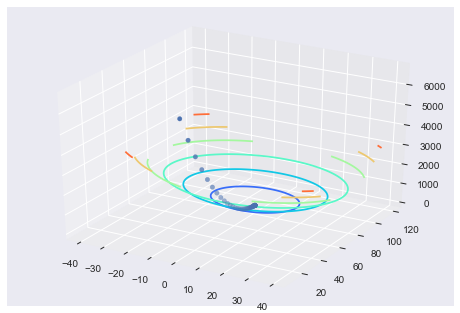

In [43]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

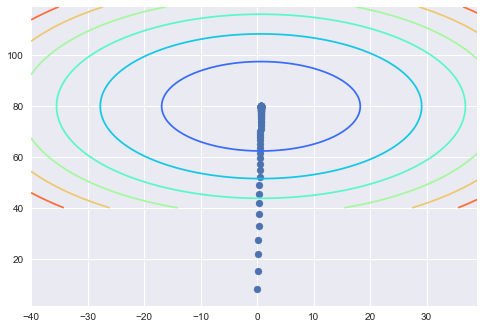

In [44]:
# 2D Contour Plot
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()

In [45]:
# Save the data in file
np.save("ThetaList.npy",theta_list)